In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [7]:
# Check for missing values
print("Missing values:", df.isnull().sum().sum())

# Split dataset into training and testing sets
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    

Missing values: 0

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0

Logistic Regression:
Uses a sigmoid function to model the probability of a binary outcome. Suitable for this dataset as it provides a clear decision boundar

. Decision Tree Classifier

Splits data recursively based on feature thresholds, creating a tree structure. Easy to interpret and works well with both linear and nonlinear da

ta. Random Forest Classifir:

An ensemble of multiple decision trees. Reduces overfitting by averaging multiple trees' predict

ions. Support Vector Machine (VM):

Finds the optimal hyperplane that best separates different classes. Effective for high-dimensional da

tasets. k-Nearest Neighbors k-NN):

Assigns a class based on the majority class of the k closest neighbors. Works well when decision boundaries are non-linear.

In [9]:
# Compare performance
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                     Accuracy
SVM                  0.982456
Logistic Regression  0.973684
Random Forest        0.964912
Decision Tree        0.947368
k-NN                 0.947368


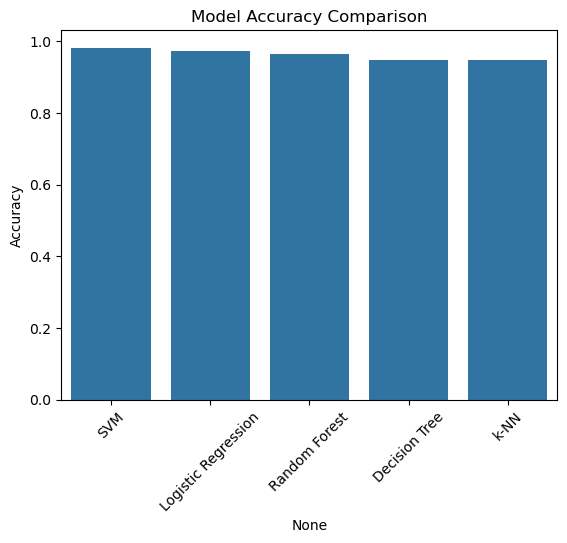

In [11]:
# Visualization
sns.barplot(x=results_df.index, y=results_df['Accuracy'])
plt.xticks(rotation=45)
plt.title('Model Accuracy Comparison')
plt.show()